<a href="https://colab.research.google.com/github/velish-qubadov/Deep-Learning/blob/main/DL-Advanced-Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Xavier and He Initialization

In [ ]:
import tensorflow as tf
dense = tf.keras.layers.Dense(50, activation='relu',
                              kernel_initializer='he_normal')

In [ ]:
he_avg_init = tf.keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                                    distribution='uniform')
dense = tf.keras.layers.Dense(50, activation='sigmoid',
                              kernel_initializer=he_avg_init)

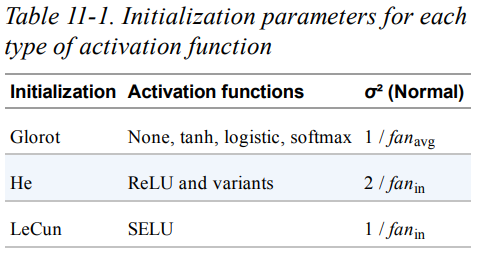

# Nonsaturating Activation Functions

### Leaky Relu

In [ ]:
def leaky_relu(z,alpha):
  return np.maximum(alpha*z, z)
z=np.linspace(-5,5,200)

In [ ]:
leaky_relu= tf.keras.layers.LeakyReLU(alpha=0.2)
dense=tf.keras.layers.Dense(50, activation=leaky_relu, kernel_initializer='he_normal')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, kernel_initializer='he_normal'),
    tf.keras.layers.LeakyReLU(alpha=0.2)
])

### ELU

In [ ]:
dense= tf.keras.layers.Dense(50, activation='elu', kernel_initializer='he_normal')

### SELU

In [ ]:
dense = tf.keras.layers.Dense(50, activation='selu',
                              kernel_initializer='lecun_normal')

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
for layer in range(100):
  model.add(tf.keras.layers.Dense(100, activation='selu',
                                  kernel_initializer='lecun_normal'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy'])

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid, X_test = X_train / 255, X_valid / 255, X_test / 255

In [ ]:
class_names = ["T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

In [ ]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

In [ ]:
tf.random.set_seed(42)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
for layer in range(100):
  model.add(tf.keras.layers.Dense(100, activation='relu',
                                  kernel_initializer='he_normal'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

### GELU, Swish and Mish

In [ ]:
def swish(z, beta=1):
  return z * sigmoid(beta * z)

def approx_gelu(z):
  return swish(z, beta=1.702)

def softplus(z):
  return np.log(1 + np.exp(z))

def mish(z):
  return z * np.tanh(softplus(z))

# Batch Normalization

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
tf.random.set_seed(42)

In [ ]:
model= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(X_train,y_train,epochs=2, validation_data=(X_valid,y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7582 - loss: 0.7077 - val_accuracy: 0.8524 - val_loss: 0.3995
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8578 - loss: 0.4050 - val_accuracy: 0.8632 - val_loss: 0.3717


In [ ]:

tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, kernel_initializer='he_normal', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(100, kernel_initializer='he_normal', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7381 - loss: 0.8023 - val_accuracy: 0.8484 - val_loss: 0.4272
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8482 - loss: 0.4398 - val_accuracy: 0.8632 - val_loss: 0.3831


# Gradient Clipping for RNN

In [ ]:
optimizer = tf.keras.optimizers.SGD(clipvalue=1.0)        # 1dən balaca olanlara dəymir, ondan böyükləri normalizə edir  (bir növ learning_rate i azaldir hər ikisi)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer)

In [ ]:
optimizer=tf.keras.optimizers.SGD(clipnorm=1.0)           # bütün datanı max 1 olmaq şərti ilə normalizə edir
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer)

# Reusing Pretrained Layers

transfer learning

In [ ]:
pos_class_id = class_names.index("Pullover")
neg_class_id = class_names.index("T-shirt/top")

def split_dataset(X, y):
    y_for_B = (y == pos_class_id) | (y == neg_class_id)
    y_A = y[~y_for_B]
    y_B = (y[y_for_B] == pos_class_id).astype(np.float32)
    old_class_ids = list(set(range(10)) - set([neg_class_id, pos_class_id]))
    for old_class_id, new_class_id in zip(old_class_ids, range(8)):
        y_A[y_A == old_class_id] = new_class_id  # reorder class ids for A
    return ((X[~y_for_B], y_A), (X[y_for_B], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [ ]:

tf.random.set_seed(42)

model_A = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(8, activation='softmax')

])

model_A.compile(loss='sparse_categorical_crossentropy',
                optimizer= tf.keras.optimizers.SGD(learning_rate=1e-3),
                metrics=['accuracy'])
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                      validation_data=(X_valid_A, y_valid_A))
model_A.save('my_model_A.keras')

Epoch 1/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5198 - loss: 1.5555 - val_accuracy: 0.7701 - val_loss: 0.7080
Epoch 2/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7891 - loss: 0.6541 - val_accuracy: 0.8396 - val_loss: 0.5183
Epoch 3/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8425 - loss: 0.5030 - val_accuracy: 0.8604 - val_loss: 0.4392
Epoch 4/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8624 - loss: 0.4315 - val_accuracy: 0.8679 - val_loss: 0.3951
Epoch 5/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8714 - loss: 0.3890 - val_accuracy: 0.8739 - val_loss: 0.3672
Epoch 6/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8800 - loss: 0.3609 - val_accuracy: 0.8797 - val_loss: 0.3485
Epoch 7/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8857 - loss: 0.3409 - val_accuracy: 0.8814 - val_loss: 0.3349
Epoch 8/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8901 - loss: 0.3259 -

In [ ]:
tf.random.set_seed(42)
model_B = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_B.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
                metrics=['accuracy'])
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))
model.evaluate(X_test_B, y_test_B)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.7311 - loss: 0.6113 - val_accuracy: 0.7804 - val_loss: 0.6128
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7757 - loss: 0.5996 - val_accuracy: 0.8358 - val_loss: 0.6016
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8433 - loss: 0.5890 - val_accuracy: 0.8675 - val_loss: 0.5911
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8786 - loss: 0.5789 - val_accuracy: 0.8882 - val_loss: 0.5811
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8858 - loss: 0.5690 - val_accuracy: 0.9080 - val_loss: 0.5714
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9213 - loss: 0.5593 - val_accuracy: 0.9149 - val_loss: 0.5621
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9263 - loss: 0.5498 - val_accuracy: 0.9209 - val_loss: 0.5531
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9282 - loss: 0.5404 - val_accuracy: 0.9228 - val_loss: 0.5442


[3.3832602500915527, 0.382999986410141]

In [ ]:
model_A = tf.keras.models.load_model("my_model_A.keras")
model_B_on_A = tf.keras.Sequential(model_A.layers[:-1])         # output layeri goturme
model_B_on_A.add(tf.keras.layers.Dense(1, activation='sigmoid'))      # onun yerine bunu elave et

In [ ]:
tf.random.set_seed(42)

In [ ]:
#CLONE strukturu kopyaliyir
model_A_clone = tf.keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())          # A modelinin clonunu gotururuk ki, B_on_A-i yeniden fit etsek, A-nin parametrleri yeniden deyishecek. Ona gore clone yaradiriq ve A modelinin weight-lerini gotururuk

In [ ]:
model_B_on_A= tf.keras.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
for layer in model_B_on_A.layers[:-1]:
  layer.traniable = False                                     # bele edirik ki, A modelinin parametrleri deyishmesin

optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model_B_on_A.compile(loss='binary_crossentropy', optimizer=optimizer,
                     metrics=['accuracy'])

history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.6711 - loss: 0.5734 - val_accuracy: 0.8744 - val_loss: 0.4512
Epoch 2/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9104 - loss: 0.4023 - val_accuracy: 0.8981 - val_loss: 0.4109
Epoch 3/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9210 - loss: 0.3619 - val_accuracy: 0.9149 - val_loss: 0.3806
Epoch 4/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9299 - loss: 0.3318 - val_accuracy: 0.9248 - val_loss: 0.3563


In [ ]:
for layer in model_B_on_A.layers[:-1]:
  layer.trainable = True

optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model_B_on_A.compile(loss='binary_crossentropy', optimizer=optimizer,
                     metrics=['accuracy'])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16, validation_data=(X_valid_B, y_valid_B))

Epoch 1/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.9457 - loss: 0.3077 - val_accuracy: 0.9308 - val_loss: 0.3362
Epoch 2/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9457 - loss: 0.2878 - val_accuracy: 0.9337 - val_loss: 0.3193
Epoch 3/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9565 - loss: 0.2710 - val_accuracy: 0.9347 - val_loss: 0.3049
Epoch 4/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9565 - loss: 0.2566 - val_accuracy: 0.9347 - val_loss: 0.2926
Epoch 5/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9565 - loss: 0.2442 - val_accuracy: 0.9357 - val_loss: 0.2818
Epoch 6/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9565 - loss: 0.2334 - val_accuracy: 0.9347 - val_loss: 0.2723
Epoch 7/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9565 - loss: 0.2238 - val_accuracy: 0.9367 - val_loss: 0.2641
Epoch 8/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9592 - loss: 0.2154 - val_accuracy: 0.9387 - val_loss: 0.2568


In [ ]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9368 - loss: 0.2303


[0.23569761216640472, 0.9315000176429749]

In [ ]:
def build_model(seed=42):
  tf.random.set_seed(seed)
  return tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=[28, 28]),
      tf.keras.layers.Dense(100, activation='relu',
                            kernel_initializer='he_normal'),
      tf.keras.layers.Dense(100, activation='relu',
                            kernel_initializer='he_normal'),

      tf.keras.layers.Dense(100, activation='relu',
                            kernel_initializer='he_normal'),
      tf.keras.layers.Dense(10, activation='softmax')
  ])

def build_and_train_model(optimizer):
  model = build_model()
  model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,
                metrics=['accuracy'])
  return model.fit(X_train, y_train, epochs=10,
                   validation_data=(X_valid, y_valid))

# Nesterov Accelerated Gradient


In [ ]:
optimizer= tf.keras.optimizers.SGD(learning_rate=1e-3, momentum=0.9, nesterov= True)

In [ ]:
history_nesterov= build_and_train_model(optimizer)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6689 - loss: 0.9758 - val_accuracy: 0.8326 - val_loss: 0.4888
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8352 - loss: 0.4752 - val_accuracy: 0.8444 - val_loss: 0.4380
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8525 - loss: 0.4235 - val_accuracy: 0.8508 - val_loss: 0.4155
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8607 - loss: 0.3941 - val_accuracy: 0.8520 - val_loss: 0.4038
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8661 - loss: 0.3733 - val_accuracy: 0.8542 - val_loss: 0.3923
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8734 - loss: 0.3566 - val_accuracy: 0.8570 - val_loss: 0.3818
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8779 - loss: 0.3434 - val_accuracy: 0.8626 - val_loss: 0.3739
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8816 - loss: 0.3321 -

#AdaGrad

In [ ]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate=1e-3)         # her parametr uchun ayri learning_rate yaradir amma global minimuma chatmir

In [ ]:
history_adagrad = build_and_train_model(optimizer)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5619 - loss: 1.4042 - val_accuracy: 0.7840 - val_loss: 0.6731
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7848 - loss: 0.6546 - val_accuracy: 0.8098 - val_loss: 0.5714
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8101 - loss: 0.5696 - val_accuracy: 0.8230 - val_loss: 0.5272
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8216 - loss: 0.5294 - val_accuracy: 0.8272 - val_loss: 0.5015
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8291 - loss: 0.5048 - val_accuracy: 0.8320 - val_loss: 0.4842
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8343 - loss: 0.4878 - val_accuracy: 0.8352 - val_loss: 0.4711
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8394 - loss: 0.4748 - val_accuracy: 0.8392 - val_loss: 0.4608
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8422 - loss: 0.4645

#RMSProp

move qarsinin alir cox dalgalanmanin qarsisin alir

In [ ]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-3, rho=0.9)

In [ ]:
history_rmsprop = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7605 - loss: 0.6692 - val_accuracy: 0.8136 - val_loss: 0.4799
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8537 - loss: 0.4051 - val_accuracy: 0.8492 - val_loss: 0.4116
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8680 - loss: 0.3693 - val_accuracy: 0.8322 - val_loss: 0.4972
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8749 - loss: 0.3558 - val_accuracy: 0.8470 - val_loss: 0.4699
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8785 - loss: 0.3457 - val_accuracy: 0.8524 - val_loss: 0.4289
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8811 - loss: 0.3417 - val_accuracy: 0.8486 - val_loss: 0.4964
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8828 - loss: 0.3377 - val_accuracy: 0.8672 - val_loss: 0.4406
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8856 - loss: 0.3350

#Adam Optimization

momentum ile RMSProp birge isledir

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3, beta_1=0.9,    # momentum
                                     beta_2 = 0.999)  # RMSProp
history_adam = build_and_train_model(optimizer)


#Adamax Optimization

In [ ]:
optimizer = tf.keras.optimizers.Adamax(learning_rate=1e-3, beta_1=0.9,
                                       beta_2 = 0.999)
history_adamax = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7594 - loss: 0.6993 - val_accuracy: 0.8334 - val_loss: 0.4499
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8551 - loss: 0.4121 - val_accuracy: 0.8446 - val_loss: 0.4070
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8687 - loss: 0.3661 - val_accuracy: 0.8494 - val_loss: 0.3949
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8790 - loss: 0.3373 - val_accuracy: 0.8600 - val_loss: 0.3705
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8865 - loss: 0.3155 - val_accuracy: 0.8642 - val_loss: 0.3624
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8910 - loss: 0.2995 - val_accuracy: 0.8688 - val_loss: 0.3585
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8974 - loss: 0.2850 - val_accuracy: 0.8632 - val_loss: 0.3667
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9022 - loss: 0.2726 -

nesterov+ adam

# AdamW Optimization

In [ ]:
optimizer = tf.keras.optimizers.AdamW(weight_decay=1e-5, learning_rate=1e-3,
                                      beta_1=0.9, beta_2=0.999)
history_adamw = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7729 - loss: 0.6360 - val_accuracy: 0.8468 - val_loss: 0.4018
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8572 - loss: 0.3883 - val_accuracy: 0.8438 - val_loss: 0.4031
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.8714 - loss: 0.3451 - val_accuracy: 0.8564 - val_loss: 0.3732
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8818 - loss: 0.3173 - val_accuracy: 0.8578 - val_loss: 0.3815
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8908 - loss: 0.2957 - val_accuracy: 0.8516 - val_loss: 0.4050
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8954 - loss: 0.2788 - val_accuracy: 0.8648 - val_loss: 0.3864
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9003 - loss: 0.2664 - val_accuracy: 0.8598 - val_loss: 0.3971
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9043 - loss: 0.

# Power Scheduling

Daha yavaş və sabit azalma verir.

Overfitting qarşısını almaqda kömək edir.

Power dəyərinə görə davranışı dəyişir.

In [ ]:
# REOMMENDED:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate=0.01,
    decay_steps=10_000,
    decay_rate=1.0,
    staircase=False
)

optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [ ]:
history_power_scheduling= build_and_train_model(optimizer)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6545 - loss: 1.0395 - val_accuracy: 0.8260 - val_loss: 0.4927
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8270 - loss: 0.4956 - val_accuracy: 0.8318 - val_loss: 0.4542
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8459 - loss: 0.4417 - val_accuracy: 0.8420 - val_loss: 0.4322
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8560 - loss: 0.4127 - val_accuracy: 0.8510 - val_loss: 0.4131
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8618 - loss: 0.3934 - val_accuracy: 0.8548 - val_loss: 0.4027
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8661 - loss: 0.3789 - val_accuracy: 0.8560 - val_loss: 0.3949
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8687 - loss: 0.3675 - val_accuracy: 0.8602 - val_loss: 0.3869
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8717 - loss: 0.3582 -

# Avoiding Overfitting Through Regularization


In [ ]:
layers = tf.keras.layers.Dense(100, activation='relu',
                              kernel_initializer='he_normal',
                              kernel_regularizer=tf.keras.regularizers.l2(0.01))

In [ ]:
tf.random.set_seed(42)

In [ ]:
from functools import partial
RegularizedDense= partial(tf.keras.layers.Dense,
                          activation='relu',
                          kernel_initializer='he_normal',
                          kernel_regularizer= tf.keras.regularizers.l2(0.01))
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(100),
    RegularizedDense(100),
    RegularizedDense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
optimizer= tf.keras.optimizers.SGD(learning_rate=2e-2)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=2,
                    validation_data=(X_valid, y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6983 - loss: 4.1055 - val_accuracy: 0.8214 - val_loss: 1.8739
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8116 - loss: 1.6322 - val_accuracy: 0.8222 - val_loss: 1.1236


# Dropout

Dropout – öyrənmə zamanı (yalnız training mərhələsində) şəbəkənin bəzi neyronlarını təsadüfi şəkildə "söndürən" bir regularization üsuludur.

✅ Məqsəd:
Modelin çox güclü neyron əlaqələri qurmasının və overfitting-in qarşısını almaq.

In [ ]:
tf.random.set_seed(42)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dropout(rate=0.2),                                        # burda pixellerin 20%-ini atiriq
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(rate=0.2),                                        # burda amma neuronlarin 20%-ini
    tf.keras.layers.Dense(100, activation='relu',
                          kernel_initializer='he_normal'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:

optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2,
                                    momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10,
          validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6738 - loss: 0.8964 - val_accuracy: 0.8298 - val_loss: 0.4666
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8111 - loss: 0.5270 - val_accuracy: 0.8472 - val_loss: 0.4103
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8246 - loss: 0.4868 - val_accuracy: 0.8556 - val_loss: 0.3977
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8327 - loss: 0.4602 - val_accuracy: 0.8574 - val_loss: 0.3864
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8407 - loss: 0.4415 - val_accuracy: 0.8606 - val_loss: 0.3810
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8438 - loss: 0.4303 - val_accuracy: 0.8588 - val_loss: 0.3743
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8448 - loss: 0.4221 - val_accuracy: 0.8642 - val_loss: 0.3579
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8483 - loss: 0.4115

Dropout edenden sonra hem train hem test datasini evaluate etmek lazimdir. Chunki accuracy-e baxanda neuronlarin mueyyen hissesini atir, amma evaluate edende butun neuronlari istifade edir deye overfit edir

In [ ]:
model.evaluate(X_train, y_train) , model.evaluate(X_valid, y_valid), model.evaluate(X_test, y_test)

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8844 - loss: 0.3159
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8660 - loss: 0.3652
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8666 - loss: 0.3653


([0.3179791569709778, 0.8840181827545166],
 [0.3518391251564026, 0.8730000257492065],
 [0.3737882673740387, 0.8636000156402588])

# MC Dropout

🧠 Nədir: MC Dropout (Monte Carlo Dropout)?
Normalda Dropout yalnız təlim zamanı (training) aktiv olur, test zamanı isə deaktivdir.

✅ MC Dropout isə test zamanı da Dropout-u aktiv edir.
Beləliklə, model hər proqnozda fərqli neyron alt-qrupları ilə çıxış verir.

In [ ]:
tf.random.set_seed(42)

In [ ]:

y_probas = np.stack([model(X_test, training=True)         # training true o demekdi ki predict edende de butun neyronlari goturmesin, dropout elesin                  # np.stack hamisini birleshdirir
                    for sample in range(100)])            # 100 defe o ishi tekrarlayir  (yani 100 defe predict edir)
y_proba = y_probas.mean(axis=0)                     # 100 modelin texmininin ortalamasini qaytarir


In [ ]:
model.predict(X_test[:1].round(3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


array([[3.9957202e-05, 7.4492959e-06, 4.5741717e-06, 2.2953488e-06,
        3.5872697e-06, 3.8731579e-02, 1.1262495e-05, 1.4234258e-01,
        1.7409516e-04, 8.1868255e-01]], dtype=float32)

In [ ]:
y_proba[0].round(3)

array([0.002, 0.   , 0.   , 0.001, 0.   , 0.138, 0.001, 0.177, 0.004,
       0.676], dtype=float32)

In [ ]:
y_std = y_probas.std(axis=0)
y_std[0].round(3)

array([0.011, 0.001, 0.002, 0.003, 0.001, 0.2  , 0.003, 0.142, 0.024,
       0.216], dtype=float32)

In [ ]:
y_pred = y_proba.argmax(axis=1)
accuracy = (y_pred == y_test).sum() / len(y_test)
accuracy

np.float64(0.8643)

#  Max Norm

Max-Norm regularization, neyron şəbəkələrində overfitting-in qarşısını almağa kömək edən bir digər texnikadır. Max-Norm-un məqsədi, ağırlıqları (weights) müəyyən bir maksimum dəyərə məhdudlaşdırmaqdır, beləliklə modelin çox mürəkkəb hala gəlməsinin qarşısını alır.



In [ ]:
dense = tf.keras.layers.Dense(
    100, activation='relu', kernel_initializer='he_normal',
    kernel_constraint=tf.keras.constraints.max_norm(1.))                # normallashdiranda birden artiq olsa 1e getirir

MaxNormDense = partial(tf.keras.layers.Dense,                           # funksiyani tekrarlamamaq uchun partial yaziriq
                       activation='relu', kernel_initializer='he_normal',
                       kernel_constraint=tf.keras.constraints.max_norm(1.0))


tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(100),
    MaxNormDense(100),
    tf.keras.layers.Dense(10, activation='softmax')
])
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10,
          validation_data=(X_valid, y_valid))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7390 - loss: 0.7303 - val_accuracy: 0.8360 - val_loss: 0.4347
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8452 - loss: 0.4239 - val_accuracy: 0.8462 - val_loss: 0.4017
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8589 - loss: 0.3827 - val_accuracy: 0.8490 - val_loss: 0.3975
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8672 - loss: 0.3596 - val_accuracy: 0.8554 - val_loss: 0.3742
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8696 - loss: 0.3471 - val_accuracy: 0.8408 - val_loss: 0.4045
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8747 - loss: 0.3374 - val_accuracy: 0.8544 - val_loss: 0.3716
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.8759 - loss: 0.3310 - val_accuracy: 0.8468 - val_loss: 0.3930
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8792 - loss: 0.322

# Hands-On

In [ ]:
import tensorflow as tf

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
X_train, X_test = X_train / 255, X_test/255

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
class_names[y_train[0][0]]

'frog'

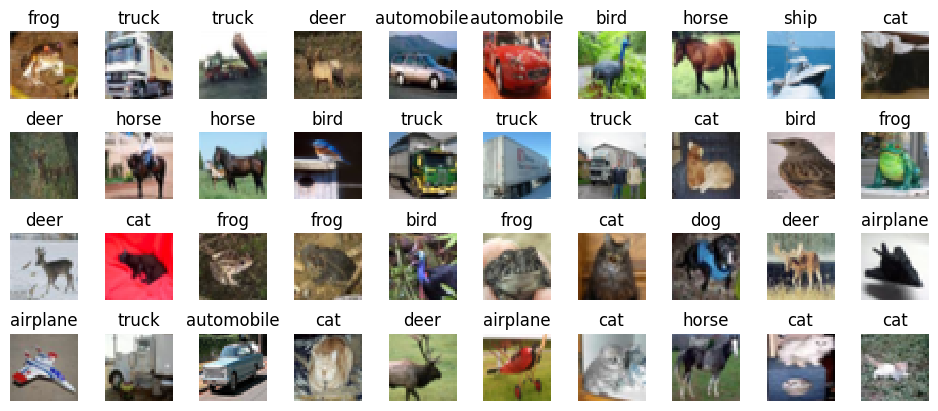

In [ ]:
n_rows=4
n_cols=10
plt.figure(figsize=(n_cols*1.2, n_rows*1.2))
for row in range(n_rows):
  for col in range(n_cols):
    index=n_cols*row +col
    plt.subplot(n_rows, n_cols, index+1)
    plt.imshow(X_train[index], cmap='binary', interpolation='nearest')
    plt.axis('off')
    plt.title(class_names[y_train[index][0]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
input = tf.keras.layers.Input(shape=[32, 32, 3])
flattened = tf.keras.layers.Flatten()(input)
normalized = tf.keras.layers.Normalization()(flattened)
hidden1 = tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal')(normalized)
drop1 = tf.keras.layers.Dropout(0.3)(hidden1)
hidden2 = tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal')(drop1)
drop2 = tf.keras.layers.Dropout(0.3)(hidden2)
hidden3 = tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal')(drop2)
drop3 = tf.keras.layers.Dropout(0.3)(hidden3)
concat = tf.keras.layers.Concatenate()([normalized, drop3])
output = tf.keras.layers.Dense(10, activation='softmax')(concat)
model=tf.keras.Model(inputs=[input], outputs=[output])
checkpoint_cb=tf.keras.callbacks.ModelCheckpoint('my_checkpoints.weights.h5', save_weights_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate=0.01,
    decay_steps=10_000,
    decay_rate=1.0,
    staircase=False
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
model.fit(X_train[:10000], y_train[:10000], epochs=1000,
          validation_data=(X_test, y_test),
          callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/1000


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_49']
Received: inputs=Tensor(shape=(None, 32, 32, 3))
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.1937 - loss: 6.0538 - val_accuracy: 0.2096 - val_loss: 3.5252
Epoch 2/1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.2802 - loss: 3.0986 - val_accuracy: 0.2423 - val_loss: 3.6119
Epoch 3/1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.3055 - loss: 3.0336 - val_accuracy: 0.2620 - val_loss: 3.6103
Epoch 4/1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.3090 - loss: 2.9139 - val_accuracy: 0.3024 - val_loss: 2.7358
Epoch 5/1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.3253 - loss: 2.8780 - val_accuracy: 0.3085 - val_loss: 3.0996
Epoch 6/1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.3410 - loss: 2.8391 - val_accuracy: 0.3235 - val_loss: 2.4515
Epoch 7/1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.3571 - loss: 2.5452 - val_accuracy: 0.2681 - val_loss: 3.4153
Epoch 8/1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.3286 - loss: 2.9101 - val_a

In [ ]:
model.evaluate(X_train, y_train), model.evaluate(X_test, y_test)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3667 - loss: 2.2304
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3256 - loss: 2.4476


([2.369983673095703, 0.3429799973964691],
 [2.451526403427124, 0.32350000739097595])

🧠 Nədir AlphaDropout?
AlphaDropout, Dropout-a bənzər bir texnikadır, lakin Self-Normalizing Neural Networks üçün, yəni SELU aktivasiya funksiyası istifadə olunan modellər üçün nəzərdə tutulub.

In [ ]:
from tensorflow.keras import layers
model = tf.keras.models.Sequential([
    layers.Flatten(input_shape=[32, 32, 3]),
    layers.Dense(128, activation='selu', kernel_initializer='lecun_normal'),
    layers.AlphaDropout(0.2),
    layers.Dense(64, activation='selu', kernel_initializer='lecun_normal'),
    layers.AlphaDropout(0.2),
    layers.Dense(64, activation='selu', kernel_initializer='lecun_normal'),
    layers.AlphaDropout(0.2),
    layers.Dense(10, activation='softmax')
])
checkpoint_cb=tf.keras.callbacks.ModelCheckpoint('my_checkpoints.weights.h5', save_weights_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate=0.01,
    decay_steps=10_000,
    decay_rate=1.0,
    staircase=False
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
checkpoint_cb=tf.keras.callbacks.ModelCheckpoint('my_checkpoints.weights.h5', save_weights_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate=0.01,
    decay_steps=10_000,
    decay_rate=1.0,
    staircase=False
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(X_train[:10000], y_train[:10000], epochs=1000,
          validation_data=(X_test, y_test),
          callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.1090 - loss: 2.9150 - val_accuracy: 0.1733 - val_loss: 2.3523
Epoch 2/1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.1762 - loss: 2.1919 - val_accuracy: 0.1773 - val_loss: 2.4222
Epoch 3/1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.1689 - loss: 2.1989 - val_accuracy: 0.2000 - val_loss: 2.2070
Epoch 4/1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.1753 - loss: 2.1612 - val_accuracy: 0.1955 - val_loss: 2.1342
Epoch 5/1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.1695 - loss: 2.1706 - val_accuracy: 0.2019 - val_loss: 2.2085
Epoch 6/1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.1785 - loss: 2.1415 - val_accuracy: 0.1919 - val_loss: 2.2997
Epoch 7/1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.1827 - loss: 2.1634 - val_accuracy: 0.1784 - val_loss: 2.4233
Epoch 8/1000
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.1933 - loss: 2

In [ ]:
model.evaluate(X_train, y_train), model.evaluate(X_test, y_test)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2376 - loss: 1.9677
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2265 - loss: 2.0057


([1.991878628730774, 0.2351199984550476],
 [2.001312494277954, 0.22830000519752502])